**EDA**

In [36]:
# Imported the needed packages
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

In [37]:
# Loaded in the data
df = pd.read_csv('comp2_raw.csv', header=0)

In [17]:
# Printing out the first 5 rows of the dataset
df.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
# Looking at the different columns that we have
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [19]:
# Seeing how many rows and entries that we have
df.shape

(30000, 25)

In [20]:
# Looking at how many values are in each row in order to see 
# if there are any missing values. We know there should be 30,000 in each. 
df.count()

Unnamed: 0    30000
X1            30000
X2            30000
X3            30000
X4            30000
X5            30000
X6            30000
X7            30000
X8            30000
X9            30000
X10           30000
X11           30000
X12           30000
X13           30000
X14           30000
X15           30000
X16           30000
X17           30000
X18           30000
X19           30000
X20           30000
X21           30000
X22           30000
X23           30000
Y             30000
dtype: int64

In [21]:
# Looking at the descriptive statisticss for each column
df.describe(include="all")

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


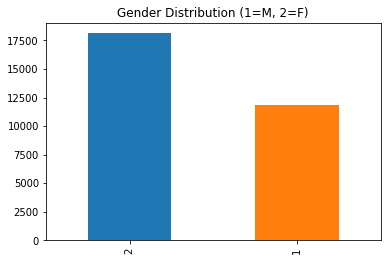

In [22]:
# Using a bar chart to see if our data mostly contains males or females
df['X2'].value_counts().plot.bar(title="Gender Distribution (1=M, 2=F)")

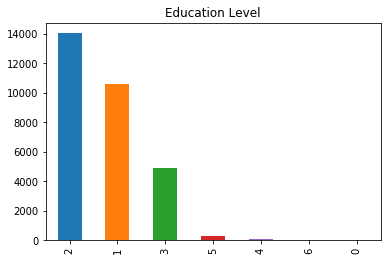

In [23]:
# Using a bar chart to see what the general eduaction level is of the people in debt
df['X3'].value_counts().plot.bar(title="Education Level")

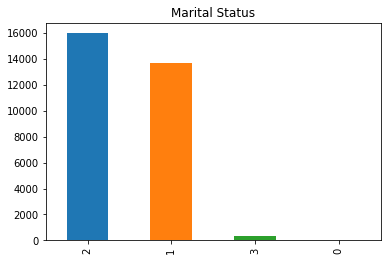

In [24]:
# Using a bar chart to see general relationship status of individuals in our data
df['X4'].value_counts().plot.bar(title="Marital Status")

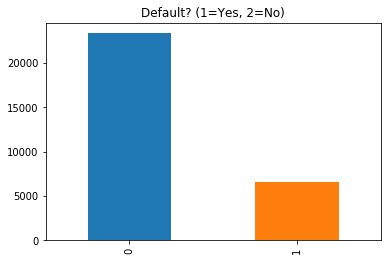

In [25]:
# Using a bar chart to display amount of individuals who defaulted and who did not 
df['Y'].value_counts().plot.bar(title="Default? (1=Yes, 2=No)")

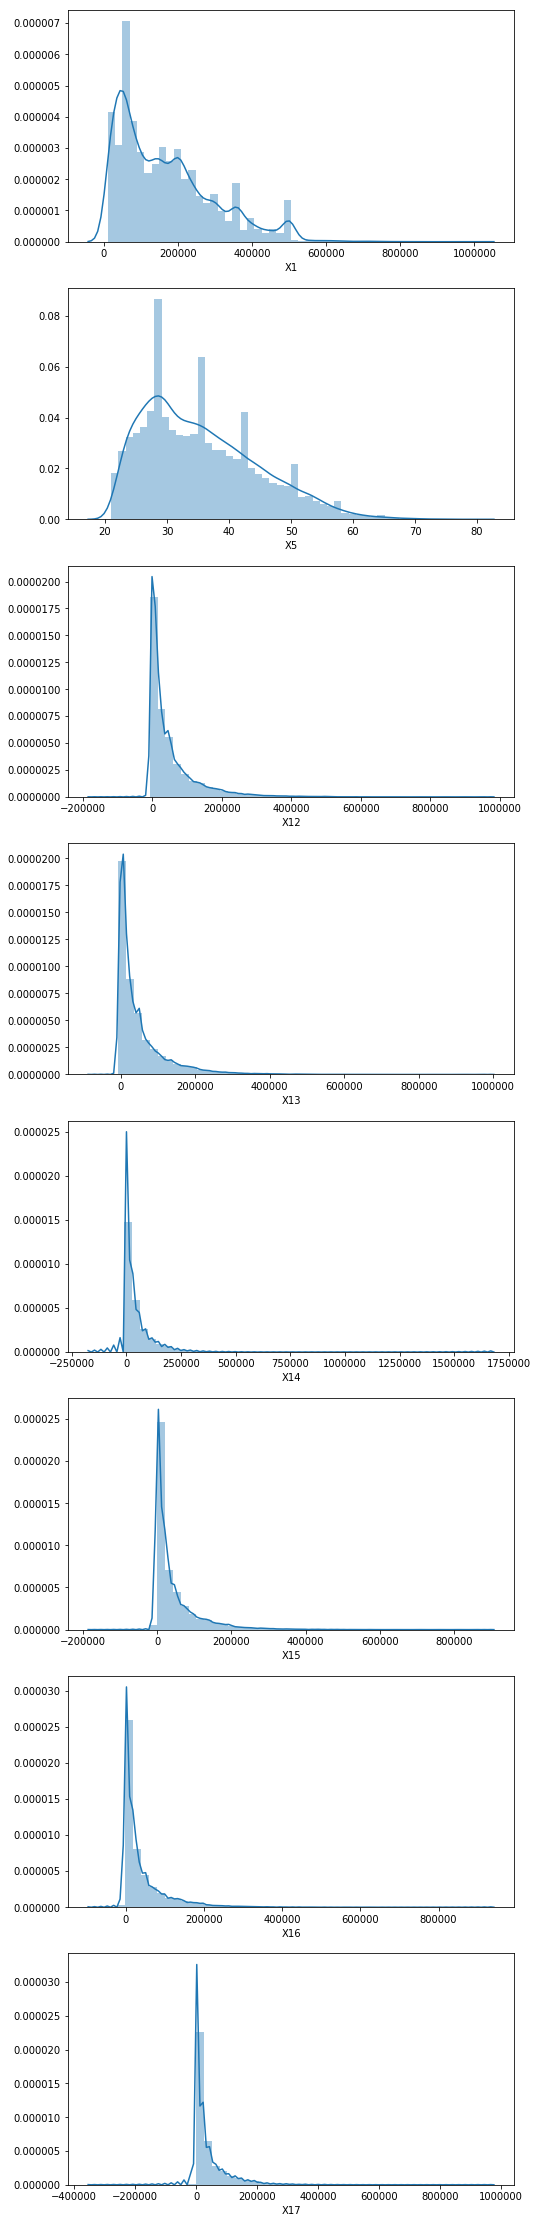

In [29]:
# Plotting a histogram of columns that have nominal values. 
## For X18-X23 all seemed around 0 so did not include
### Used the website at the bottom for help witht the code
col_names = ['X1','X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17'] 

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

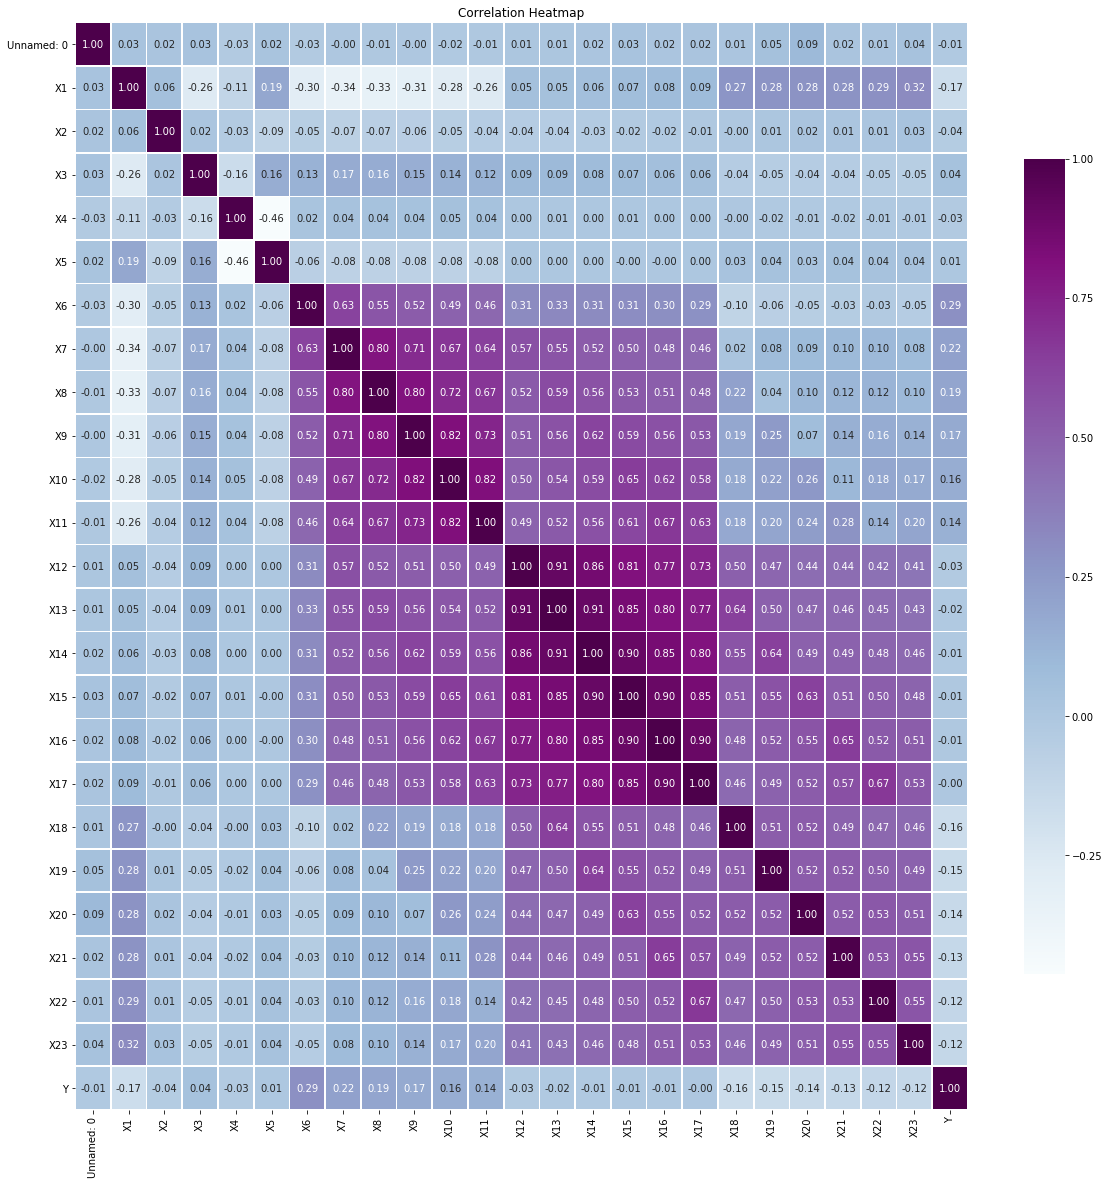

In [27]:
#Created a heatmap to see the correlation between the different variables
#Created a figure and are able to adjust the size of the graph
plt.figure(figsize = (20,20))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method
##Added the annotation so that the numbers appear in each box
display = sns.heatmap(df.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap')

Source Used:
    
https://kite.com/blog/python/data-analysis-visualization-python